<center><span style="font-size: 30pt">INDENG 222: Homework 2</span></center>
<center><span style="font-size: 18pt">Capucine Hustin, Paul Faverjon</span></center>

In [25]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
N=100
M=10000

<u><span style="font-size: 22pt">1 Brownian motion and Black Scholes model</span></u>

<u><span style="font-size: 20pt">1.1 Brownian motion</span></u>

Text(0.5, 1.0, 'A single path of a Brownian Motion using a discretisation step in time of 1/100')

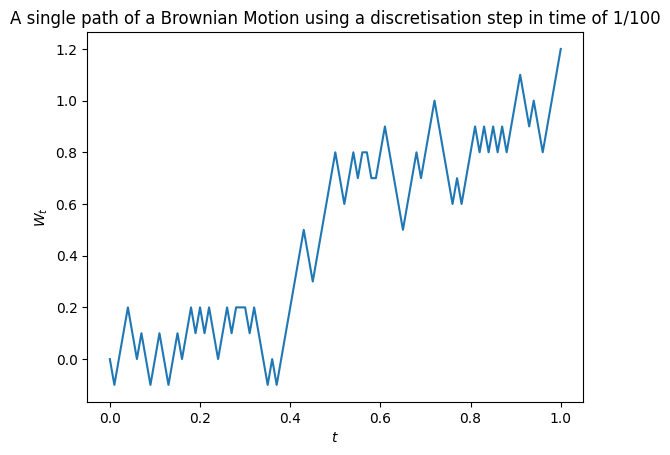

In [3]:
def X(k):
    return random.choice([-1,1]) #X is either -1 or 1

def X_n(n): #X_n is the N first X_i, so that the different step of the random walks have the all same X_i, otherwise they are all independant
    x=[X(i) for i in range(n)]
    return x

def rand_scaled_walk(n,t): #W is the n scaled random walk, t is the vector of the n+1 times
    Y_n=X_n(n)
    W=[0]+[1/math.sqrt(n)*sum(Y_n[:int(n*t[k])]) for k in range(1,n+1)] #if n=0 we have W_n=0
    return W

T=[i/N for i in range(N+1)]

path_1=rand_scaled_walk(N,T)

plt.plot(T,path_1, linestyle='-')
plt.xlabel('$t$')
plt.ylabel('$W_t$')
plt.title(f'A single path of a Brownian Motion using a discretisation step in time of 1/{N}')

In [4]:
paths=np.array([rand_scaled_walk(N,T) for _ in range(M)]) #generation of M paths of Brownian motions. We'll use the same one for the next questions

In [5]:
mean = np.mean(paths,axis=0)
variance = np.std(paths,axis=0)**2

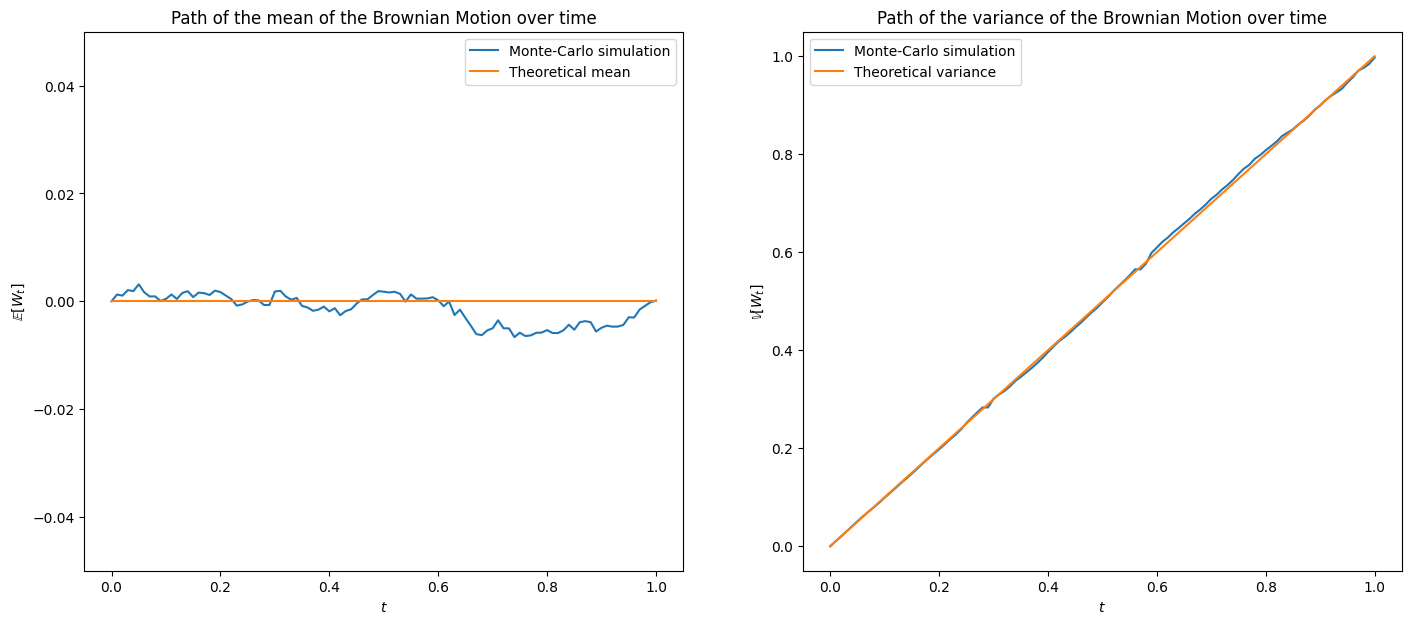

In [6]:
fig, axs = plt.subplots(1, 2,figsize=(17, 7))
axs[0].plot(T,mean, linestyle='-',label='Monte-Carlo simulation')
axs[0].plot(T,np.zeros(N+1), linestyle='-',label='Theoretical mean')
axs[0].set_title('Path of the mean of the Brownian Motion over time')
axs[0].set_xlabel('$t$')
axs[0].set_ylabel('$\mathbb{E}[W_t]$')
axs[0].set_ylim(-0.05, 0.05)
axs[0].legend()

axs[1].plot(T,variance, linestyle='-',label='Monte-Carlo simulation')
axs[1].plot(T,T, linestyle='-',label='Theoretical variance')
axs[1].set_title('Path of the variance of the Brownian Motion over time')
axs[1].set_xlabel('$t$')
axs[1].set_ylabel('$\mathbb{V}[W_t]$')
axs[1].legend()

HAVE TO ADD THAT THE VAR OF THE QUADRATIQUE VARIATION IS 0 with MONTE CARLO?!!

In [7]:
cov_M = np.cov(paths.transpose())

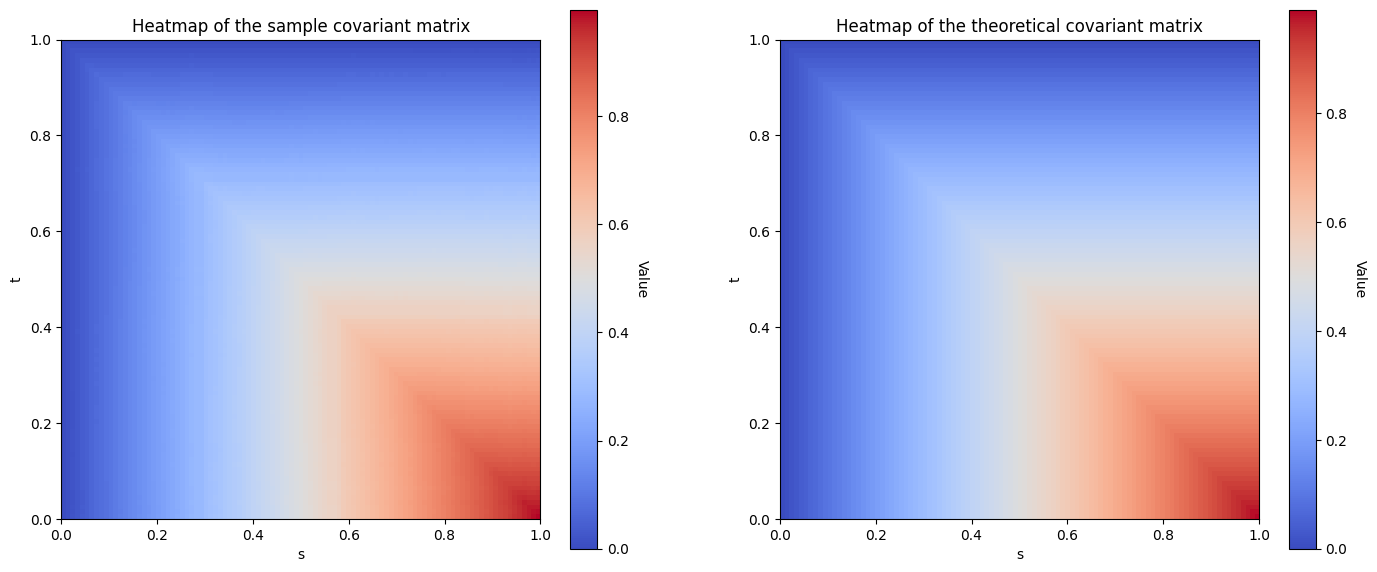

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(17, 7))
im = axs[0].imshow(cov_M, cmap='coolwarm', extent=[0, 1, 0, 1])
axs[0].set_title("Heatmap of the sample covariant matrix")
axs[0].set_xlabel("s")
axs[0].set_ylabel("t")
cbar = fig.colorbar(im, ax=axs[0])
cbar.set_label('Value', rotation=-90, va="bottom")

cov_T = np.zeros((N+1, N+1))
for i in range(N+1):
    for j in range(i+1):
        cov_T[i, j] = min(i, j)/(N+1)
        cov_T[j, i] = min(i, j)/(N+1)

im = axs[1].imshow(cov_T, cmap='coolwarm', extent=[0, 1, 0, 1])
axs[1].set_title("Heatmap of the theoretical covariant matrix")
axs[1].set_xlabel("s")
axs[1].set_ylabel("t")
cbar = fig.colorbar(im, ax=axs[1])
cbar.set_label('Value', rotation=-90, va="bottom")
plt.show()


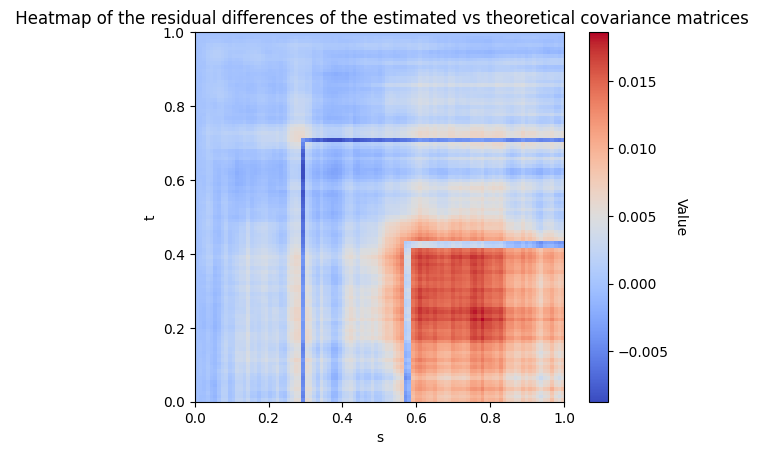

In [9]:
fig, ax = plt.subplots()
im = ax.imshow(cov_M-cov_T, cmap='coolwarm', extent=[0, 1, 0, 1])
ax.set_title(" Heatmap of the residual differences of the estimated vs theoretical covariance matrices")
ax.set_xlabel("s")
ax.set_ylabel("t")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Value', rotation=-90, va="bottom")
plt.show()

In [10]:
res_cov_upper = np.triu(cov_M-cov_T,k=1)
MSE = np.mean((res_cov_upper)**2)
print('the MSE is equal to :'+str(MSE))

the MSE is equal to :1.6779735091630795e-05


<u><span style="font-size: 20pt">1.2 Stochastic Integral</span></u>

In [11]:
def I_up(path):
    return sum([path[i+1]*(path[i+1]-path[i]) for i in range(N)])

def I_down(path):
    return sum([path[i]*(path[i+1]-path[i]) for i in range(N)])

In [12]:
dif_up=[I_up(path)-(0.5*path[N]**2+0.5) for path in paths]

In [13]:
print(np.mean(dif_up))
print(np.std(dif_up)**2)

-9.999999999990048e-05
0.0001989499999999999


In [14]:
dif_down=[I_down(path)-(0.5*path[N]**2-0.5) for path in paths]

In [15]:
print(np.mean(dif_down))
print(np.std(dif_down)**2)

9.999999999985006e-05
0.00019894999999999982


In [16]:
I=[I_down(path) for path in paths]
I_squared=[I_down(path)**2 for path in paths]
print(np.mean(I))
print(np.mean(I_squared))


-0.001360000000000071
0.4774640800000002


<u><span style="font-size: 20pt">1.3 Black-Scholes model</span></u>

In [17]:
def S_t(S_0, r, sigma, t, path):
    return S_0*np.exp((r-0.5*sigma**2)*t+sigma*path[int(N*t)])


def S_EM_t(S_0, r, sigma, t, path):
    S = S_0
    dt = 1 / N
    for i in range(int(N * t)):
        S *= (1 + r / N + sigma * (path[i+1] - path[i]))
    return S


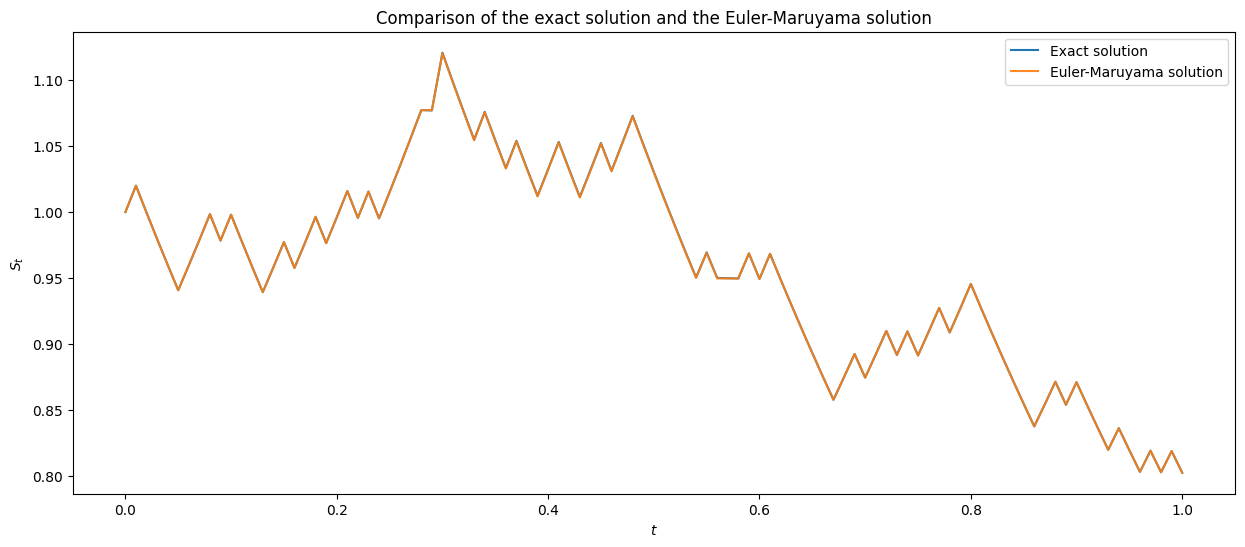

In [22]:
path=paths[0]
plt.figure(figsize=(15, 6))
plt.plot(T,[S_t(1,0,0.2,t,path) for t in T], linestyle='-',label='Exact solution')
plt.plot(T,[S_EM_t(1,0,0.2,t,path) for t in T], linestyle='-',label='Euler-Maruyama solution',alpha=0.9)
plt.xlabel('$t$')
plt.ylabel('$S_t$')
plt.title('Comparison of the exact solution and the Euler-Maruyama solution')
plt.legend()
plt.show()

In [23]:
S_1=[S_t(1,0,0.2,1,path) for path in paths]

In [24]:
print(np.mean(S_1))

0.9999654259590761


In [26]:
def callBS(T=1, S0=100, K=100, r=0.1, sigma=0.1):
    d_plus = (math.log(S0/K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d_minus = d_plus - sigma * math.sqrt(T)
    N1 = norm.cdf(d_plus)
    N2 = norm.cdf(d_minus)
    call_price = S0 * N1 - K * math.exp(-r * T) * N2
    return call_price

def putBS(T=1, S0=100, K=100, r=0.1, sigma=0.1):
    d_plus = (math.log(S0/K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d_minus = d_plus - sigma * math.sqrt(T)
    N1 = norm.cdf(-d_plus)
    N2 = norm.cdf(-d_minus)
    put_price = K * math.exp(-r * T) * N2 - S0 * N1
    return put_price

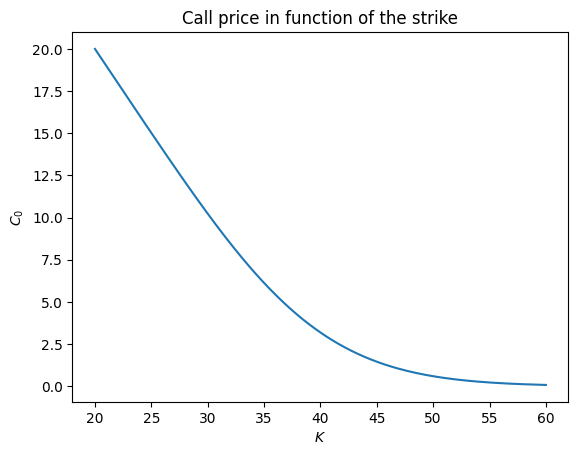

In [27]:
S_0=40
T=1
sigma = 0.2
r = 0

lst_CBS_k = [callBS(S0=S_0, K=k, T=T, sigma=sigma, r=r) for k in np.linspace(S_0 - np.round(0.5*S_0), S_0+ np.round(0.5*S_0),200)]
plt.plot(np.linspace(S_0 - np.round(0.5*S_0), S_0+ np.round(0.5*S_0),200),lst_CBS_k)
plt.xlabel('$K$')
plt.ylabel('$C_0$')
plt.title('Call price in function of the strike')
plt.show()

In [28]:
def putcall_check(tol=1e-5, T=1, S0=50, K=55, r=0.1, sigma=0.1):
    call_price = callBS(T=T, S0=S0, K=K, r=r, sigma=sigma)
    put_price = putBS(T=T, S0=S0, K=K, r=r, sigma=sigma)
    return np.abs(call_price - put_price - S0 + K*np.exp(-r*T)) <= tol

putcall_check()

True

<u><span style="font-size: 20pt">1.4 Approximation formula</span></u>

In [33]:
T=1
r=0.1
sigmas=[0.1+0.1*i/N for i in range(N+1)]
S_0=40
K_ATM=np.exp(r*T)*S_0

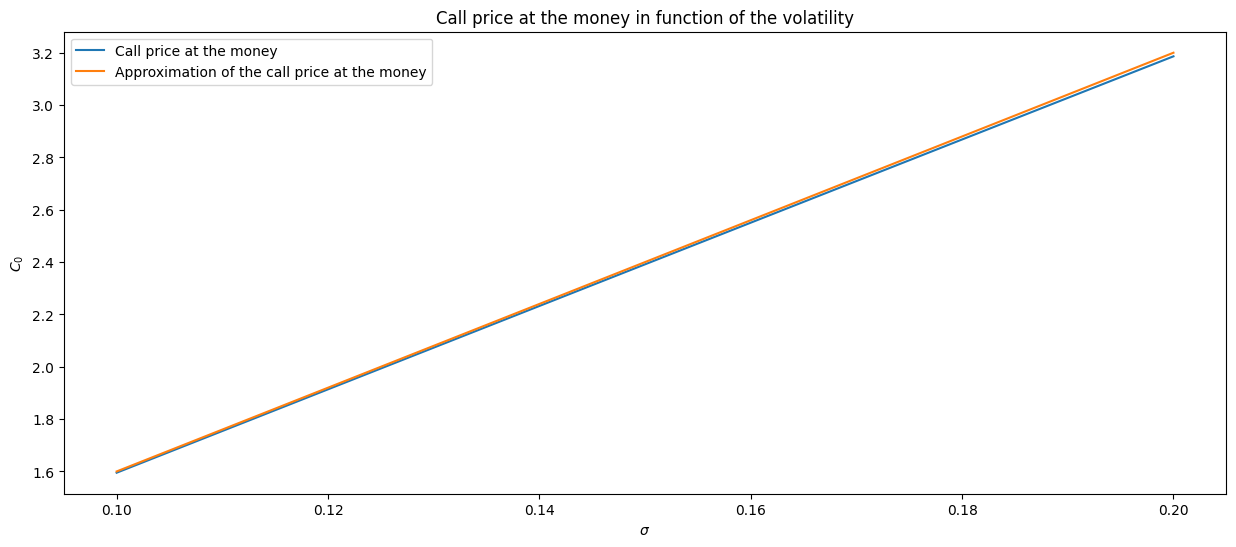

In [35]:
plt.figure(figsize=(15, 6))
plt.plot(sigmas,[callBS(T=T, S0=S_0, K=K_ATM, r=r, sigma=sigma) for sigma in sigmas], linestyle='-',label='Call price at the money')
plt.plot(sigmas,[0.4*sigma*S_0 for sigma in sigmas], linestyle='-',label='Approximation of the call price at the money')
plt.xlabel('$\sigma$')
plt.ylabel('$C_0$')
plt.title('Call price at the money in function of the volatility')
plt.legend()
plt.show()

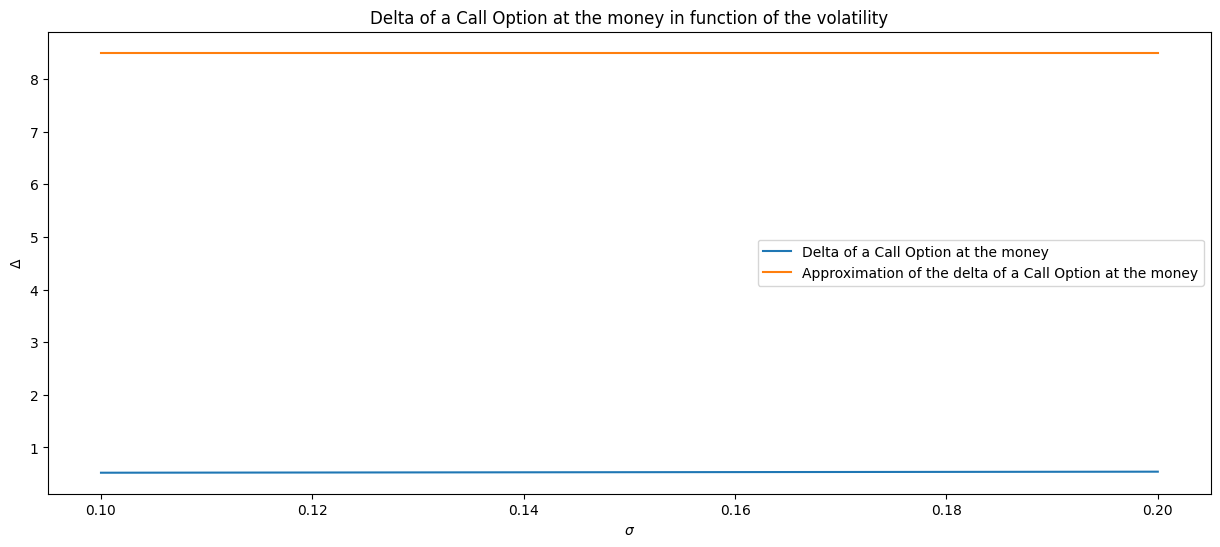

In [36]:
plt.figure(figsize=(15, 6))
plt.plot(sigmas,[norm.cdf(sigma/2*np.sqrt(T)) for sigma in sigmas], linestyle='-',label='Delta of a Call Option at the money')
plt.plot(sigmas,[0.5 + 0.2*S_0*np.sqrt(T) for sigma in sigmas], linestyle='-',label='Approximation of the delta of a Call Option at the money')
plt.xlabel('$\sigma$')
plt.ylabel('$\Delta$')
plt.title('Delta of a Call Option at the money in function of the volatility')
plt.legend()
plt.show()

In [37]:
def vega_callBS(T=1, S0=100, K=100, r=0, sigma=0.1):
    d_plus = (sigma/2*np.sqrt(T))
    N1 = norm.pdf(d_plus)
    return S0*N1*np.sqrt(T)

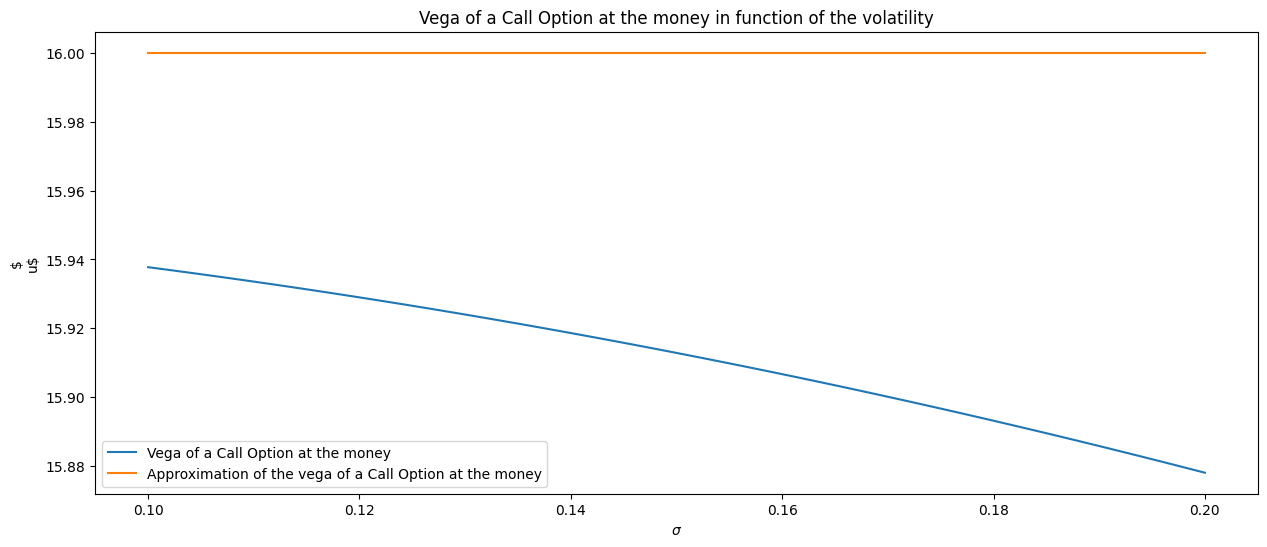

In [38]:
plt.figure(figsize=(15, 6))
plt.plot(sigmas,[vega_callBS(T=T, S0=S_0, K=K_ATM, r=r, sigma=sigma) for sigma in sigmas], linestyle='-',label='Vega of a Call Option at the money')
plt.plot(sigmas,[0.4*S_0*np.sqrt(T) for sigma in sigmas], linestyle='-',label='Approximation of the vega of a Call Option at the money')
plt.xlabel('$\sigma$')
plt.ylabel('$\nu$')
plt.title('Vega of a Call Option at the money in function of the volatility')
plt.legend()
plt.show()